homework2 practice 1
==

[Kagle dataset](https://www.kaggle.com/deeptiagl/notebook8c69ceb62e/data)

### import library   

In [1]:
import pandas as pd
import numpy as np

## 1.Top-10 Reviewer

### initialization

Datapath = "./Reviews.csv" 

In [2]:
# Input data path
data_path = "./Reviews.csv" 

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path, index_col = False)[:10000]

### obtain score sum and average

In [3]:
group = pd_data.groupby([ 'UserId','ProfileName'])
output = group.size().reset_index(name='Score count')
ave = group['Score'].mean().reset_index(name='Score mean')['Score mean']
output["Score mean"] = ave

### sort the dataframe by number of reviews

In [4]:
output = output.sort_values(by = ['Score count'], ascending=False)
output.reset_index(drop=True, inplace=True)
output.head(10)

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


## 2.Plot score distribution for the user with the most number of reviews

### import library

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

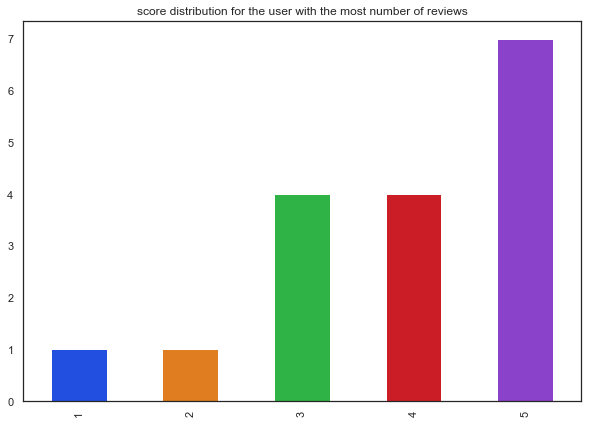

In [6]:
target = output["UserId"][0]
target_data = pd_data.loc[pd_data['UserId'] == target]
target_score = target_data.groupby(['Score']).size().reset_index(name='Count')

# Set seaborn plot and color style 
sns.set(style="white")
sns.set_palette(sns.color_palette('bright'))

# Set plot size
plt.figure(figsize=(10, 7))

# Generate plot
plot = sns.barplot(x = 'Score', y = 'Count', data = target_score)

# Set these based on your column counts
columncounts = [50,50,50,50,50]

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(plot.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

    
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    
# Set title and label
plot.set_title('score distribution for the user with the most number of reviews')
plot.set_xlabel('')
plot.set_ylabel('')

# Plot
plt.show()


## 3.Plot pandas Series DataFrame (Time->Date)

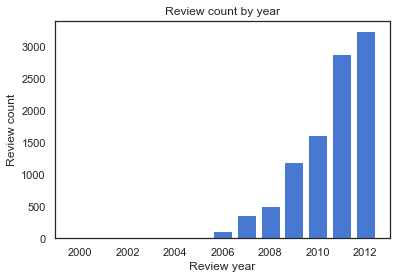

In [7]:
# Create a new dataframe object and fill it with year data
tmp_data = pd.DataFrame()
tmp_data["Year"] = pd.to_datetime(pd_data["Time"], unit='s').dt.year

# Group by year and count its size
group_year = tmp_data.groupby('Year')
year_count = group_year.size().reset_index(name='Review Count')

# Set up plot color
sns.set_palette(sns.color_palette('muted'))

# Plot bar with year and count
plt.bar(year_count['Year'],year_count['Review Count'])

# Set up plot label
plt.xlabel("Review year")
plt.ylabel("Review count")
plt.title("Review count by year")
plt.show()

## 4.Plot HeatMap using seaborn

This heat map works by correlation. This shows you which variables are correlated to each other from a scale of 1 being the most correlated and -1 is not correlated at all.   
Adding the annot parameter will add correlation numbers to each cell in the visuals.

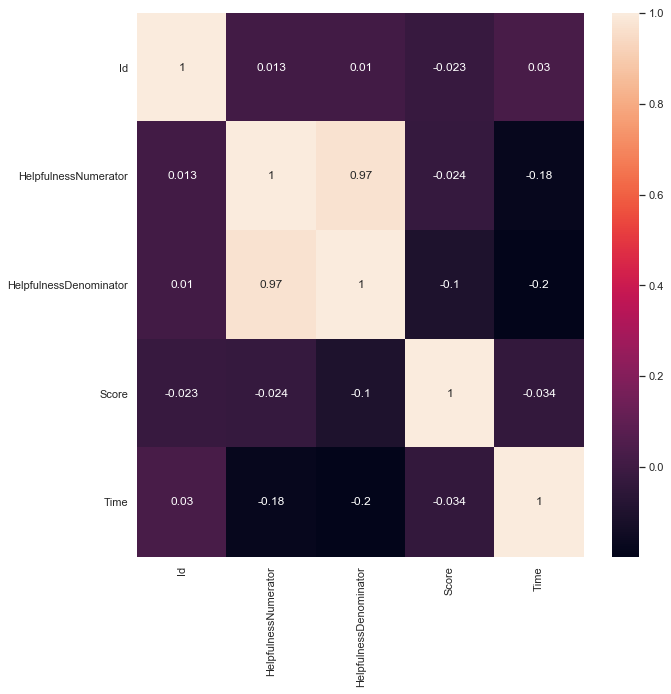

In [8]:
heat_df = pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]
plt.figure(figsize=(10, 10))
sns.heatmap(heat_df.corr(),annot=True)
plt.show()

5.Helpful percent
==

*    If viewers of that comment upvote the comment, then it adds to Helpfulness numerator.
*    If viewers of that comment just make a comment, then it adds to Helpfulness denominator.
*    Note : you should filter out some cases with numerator > denominator
*    Plot the distribution of helpful percent (hint: .hist())
*    Ratio = -1, if both Helpfulness numerator & Helpfulness denominator are zero.  

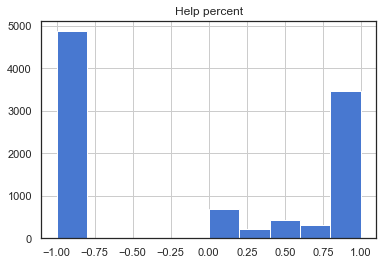

In [9]:
# Percentage calculating function
def percentage_calculator(row):
    if row['HelpfulnessNumerator'] <= row['HelpfulnessDenominator'] and row['HelpfulnessDenominator']!= 0:
        return row['HelpfulnessNumerator']/row['HelpfulnessDenominator']
    elif row['HelpfulnessNumerator'] == 0 and row['HelpfulnessDenominator'] == 0:
        return -1
    else:
        return 0

# Create a new dataframe object and get the return value after percentage is obtained
tmp_data = pd.DataFrame()
tmp_data['Help percent'] = pd_data.apply(percentage_calculator, axis=1)

# Draw
sns.set_palette(sns.color_palette('muted'))
hist = tmp_data.hist(column='Help percent')